## Hello everyone !
### This is my analysis on 'Game Of Thrones Script' dataset. I am going to do exploratory data analysis on the data and project visualizations.

In [1]:
import numpy as np ## Linear ALgebra
import pandas as pd ## For working with data
import plotly.express as px ## Visualization
import plotly.graph_objects as go ## Visualization
import matplotlib.pyplot as plt ## Visualization
import plotly as py ## Visualization
from wordcloud import WordCloud, STOPWORDS ## To create word clouds from script
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path = os.path.join(dirname, filename)

df = pd.read_csv(path)

/kaggle/input/game-of-thrones-script-all-seasons/Game_of_Thrones_Script.csv


In [3]:
df.shape

(23911, 6)

In [4]:
df.isnull().sum()

Release Date     0
Season           0
Episode          0
Episode Title    0
Name             3
Sentence         0
dtype: int64

In [5]:
df.dropna(inplace=True) ## We can drop the null values as they're very less in number.

In [6]:
df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23908 entries, 0 to 23910
Data columns (total 6 columns):
Release Date     23908 non-null object
Season           23908 non-null object
Episode          23908 non-null object
Episode Title    23908 non-null object
Name             23908 non-null object
Sentence         23908 non-null object
dtypes: object(6)
memory usage: 1.3+ MB


#### The Date is in string format. It can be more useful for us if we change it into datetime object.

In [8]:
df.loc[:,'Release Date'] = pd.to_datetime(df['Release Date'])

df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
month_mapper = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
               7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df.loc[:,'Month'] = df['Month'].map(month_mapper)

## Dialouges

In [9]:
temp = df['Season'].value_counts().reset_index()
temp.columns=['Season', 'Counts']
temp.sort_values(by='Season', inplace=True)
px.bar(temp, 'Season', 'Counts', title='Total dialougue counts in season.')

### Most Frequently used words in dialogues .

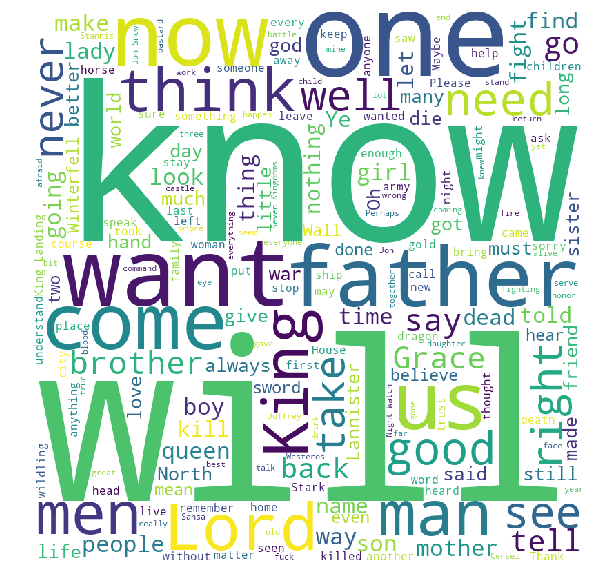

In [10]:
wordcloud = WordCloud(width = 800, height = 800,stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(
    ' '.join(i for i in df['Sentence']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### Now, i am going to see what words do my favourite characters use in their dialogue most frequently.

#### Ttyrion Lannister

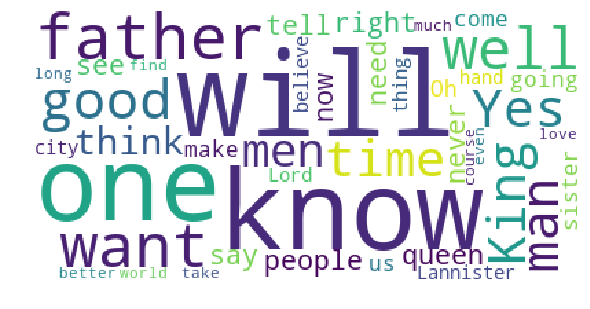

In [11]:
tyrion_lannister = df[df['Name']=='tyrion lannister']
wordcloud = WordCloud(stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(
    ' '.join(i for i in tyrion_lannister['Sentence']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

#### Arya Stark

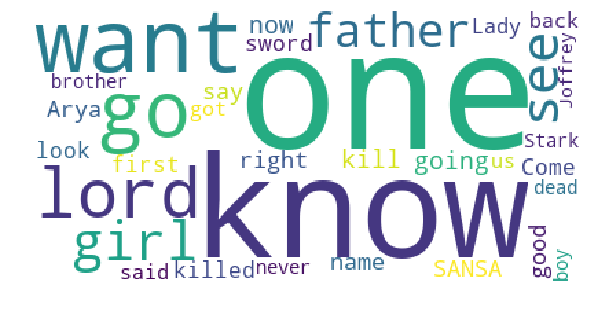

In [12]:
arya_stark = df[df['Name']=='arya stark']
wordcloud = WordCloud(stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(
    ' '.join(i for i in arya_stark['Sentence']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

#### Daenerys targaryen

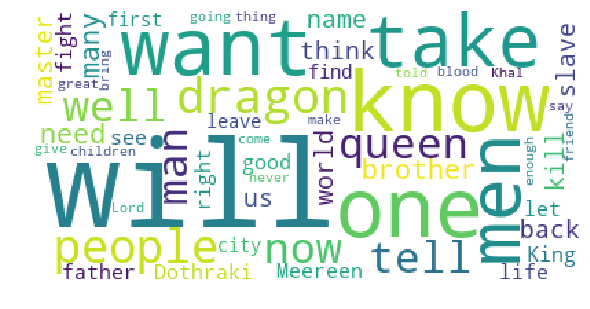

In [13]:
daenerys_targaryen = df[df['Name']=='daenerys targaryen']
wordcloud = WordCloud(stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(
    ' '.join(i for i in daenerys_targaryen['Sentence']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### Number of episodes per season

In [14]:
temp = df.groupby(by='Season')['Episode'].unique().agg(len).reset_index()
px.line(temp, 'Season', 'Episode', labels={'Episode':'Number of Episodes'})

### Most Frequent words for episode titles

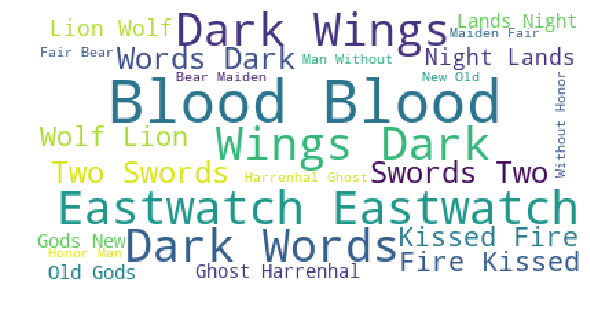

In [15]:
wordcloud = WordCloud(stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(
    ' '.join(i for i in df['Episode Title']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [16]:
print( 'Total number of characters featured in G.O.T.' , len(df['Name'].unique()))

Total number of characters featured in G.O.T. 564


### Characters with most dialouges in G.O.T.

In [17]:
temp = df['Name'].value_counts().reset_index()
temp.columns=['Character', 'No of Dialouges']
px.bar(temp.head(10), 'Character', 'No of Dialouges', color='No of Dialouges', title='Characters with most dialouges in G.O.T.')

### Seasons and their Times

In [18]:
for group,data in df.groupby(by='Season'):
    print(group, 'Was on air in Year ', data['Year'].unique())

Season 1 Was on air in Year  [2011]
Season 2 Was on air in Year  [2012]
Season 3 Was on air in Year  [2013]
Season 4 Was on air in Year  [2014]
Season 5 Was on air in Year  [2015]
Season 6 Was on air in Year  [2015 2016]
Season 7 Was on air in Year  [2017]
Season 8 Was on air in Year  [2019]


In [19]:
temp = df.groupby(by='Season')['Month'].unique().reset_index()
temp.columns = ['Season', 'Months']
month_counts = dict()
for i in temp['Months']:
    for j in i:
        if j not in month_counts :
            month_counts[j]=1
        else :
            month_counts[j]+=1
px.bar(x=month_counts.keys(), y=month_counts.values(), color=month_counts.values(),
       labels={'x':'Months', 'y':'Counts'}, title='Months that show was on air in.')

### For a friend.

#### Since my friend is interested in last names, i am going to extract that for her.

In [20]:
df['Last_Name'] = df['Name'].apply(lambda x : str(x).split()[-1])

temp = df['Last_Name'].value_counts().head(10).reset_index()
temp.columns = ['Last Name', 'Counts']
px.bar(temp, 'Last Name', 'Counts', color='Counts', title='Most populer Last Names in G.O.T.')